In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [6]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [8]:
# Linear regression (Wx + b)
def linear_regression(x):
    return W * x + b;
# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Decent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [9]:
# Optimization process.
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [10]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if(step % display_step == 0):
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.350373, W: 0.429349, b: -0.461114
step: 100, loss: 0.307970, W: 0.409012, b: -0.316935
step: 150, loss: 0.274716, W: 0.391003, b: -0.189255
step: 200, loss: 0.248638, W: 0.375054, b: -0.076186
step: 250, loss: 0.228186, W: 0.360931, b: 0.023944
step: 300, loss: 0.212148, W: 0.348423, b: 0.112616
step: 350, loss: 0.199570, W: 0.337347, b: 0.191140
step: 400, loss: 0.189707, W: 0.327539, b: 0.260678
step: 450, loss: 0.181971, W: 0.318853, b: 0.322259
step: 500, loss: 0.175905, W: 0.311160, b: 0.376792
step: 550, loss: 0.171148, W: 0.304349, b: 0.425085
step: 600, loss: 0.167417, W: 0.298316, b: 0.467852
step: 650, loss: 0.164491, W: 0.292974, b: 0.505724
step: 700, loss: 0.162197, W: 0.288244, b: 0.539263
step: 750, loss: 0.160397, W: 0.284054, b: 0.568963
step: 800, loss: 0.158986, W: 0.280344, b: 0.595265
step: 850, loss: 0.157880, W: 0.277059, b: 0.618557
step: 900, loss: 0.157012, W: 0.274149, b: 0.639184
step: 950, loss: 0.156331, W: 0.271573, b: 0.657450
step: 100

In [11]:
import matplotlib.pyplot as plt

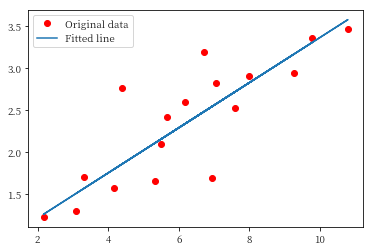

In [12]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()